# **Import libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16 

from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

# **Set all the Constants**

In [ ]:
BATCH_SIZE = 10
IMAGE_SIZE = 256
EPOCHS = 50

# **Function to Split Dataset**

In [ ]:
## The dataset is uploaded to the Google drive of dataset2 and code is ran here 

In [ ]:
!pwd

/content


In [ ]:
!unzip '/content/drive/MyDrive/Cancer_Detection_Final/Dataset/Dataset_Images_Zip.zip' -d './'

Archive:  /content/drive/MyDrive/Cancer_Detection_Final/Dataset/Dataset_Images_Zip.zip
replace ./Dataset2/benign/benign (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./Dataset2/benign/benign (1).png  
replace ./Dataset2/benign/benign (10).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./Dataset2/benign/benign (10).png  
  inflating: ./Dataset2/benign/benign (100).png  
  inflating: ./Dataset2/benign/benign (101).png  
  inflating: ./Dataset2/benign/benign (102).png  
  inflating: ./Dataset2/benign/benign (103).png  
  inflating: ./Dataset2/benign/benign (104).png  
  inflating: ./Dataset2/benign/benign (105).png  
  inflating: ./Dataset2/benign/benign (106).png  
  inflating: ./Dataset2/benign/benign (107).png  
  inflating: ./Dataset2/benign/benign (108).png  
  inflating: ./Dataset2/benign/benign (109).png  
  inflating: ./Dataset2/benign/benign (11).png  
  inflating: ./Dataset2/benign/benign (110).png  
  inflating: ./Dataset2/benign/benign (111).png  
  

## Dataset importing new method

In [ ]:
train_path = './Dataset2'

In [ ]:
train_gen = ImageDataGenerator( rescale=1./255,
                                horizontal_flip=True,
                                validation_split=0.1 )

In [ ]:
# creating two classes Benign and Malignant
# ignoring Normal to have same type of approach as features models
train_batches = train_gen.flow_from_directory(train_path,target_size=(IMAGE_SIZE,IMAGE_SIZE),classes= ['benign','malignant'], batch_size = BATCH_SIZE , subset='training')

Found 583 images belonging to 2 classes.


In [ ]:
valid_batches = train_gen.flow_from_directory(train_path,target_size=(IMAGE_SIZE,IMAGE_SIZE),classes= ['benign','malignant'], batch_size = 1 , subset='validation')

Found 64 images belonging to 2 classes.


# **Xception: Building the Model**

In [ ]:
base_model = tf.keras.applications.Xception(input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

83683744/83683744 [==============================] - 1s 0us/step


### Transfer learning performs better than freezing the weights of pretrained network

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 256 hidden units and relu activation
x = layers.Dense(256, activation='relu')(x)

# got rid of dropout
# batch normalization
x = layers.BatchNormalization()(x)

# classification output
x = layers.Dense(2, activation='softmax')(x)

model= tf.keras.models.Model(base_model.input, x)

opt= Adam(learning_rate=0.001)
##opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer =opt, 
              loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
loss = []
val_loss = []
acc = []
val_acc = []

for epoch in range (0,EPOCHS):
    print('############################ EPOCH NUMBER == ' +str(epoch))
    history = model.fit_generator(train_batches, steps_per_epoch = train_batches.samples // BATCH_SIZE , epochs = 1, validation_data = valid_batches , validation_steps = train_batches.samples)
    
    # Multiple models i.e. model on each epoch shall be saved. 
    # In the inference we shall use the best val_acc model
    model.save(str(history.history['val_acc'][0])+'_'+str(epoch)+'_final.h5')

    loss.append(history.history['loss'][0])
    val_loss.append(history.history['val_loss'][0])
    acc.append(history.history['acc'][0])
    val_acc.append(history.history['val_acc'][0])

############################ EPOCH NUMBER == 0
58/58 [==============================] - ETA: 0s - loss: 0.0622 - acc: 0.9756

58/58 [==============================] - 13s 228ms/step - loss: 0.0622 - acc: 0.9756 - val_loss: 0.7780 - val_acc: 0.8281
############################ EPOCH NUMBER == 1
58/58 [==============================] - ETA: 0s - loss: 0.1407 - acc: 0.9511

58/58 [==============================] - 14s 234ms/step - loss: 0.1407 - acc: 0.9511 - val_loss: 1.2567 - val_acc: 0.7344
############################ EPOCH NUMBER == 2
58/58 [==============================] - ETA: 0s - loss: 0.1382 - acc: 0.9616

58/58 [==============================] - 13s 226ms/step - loss: 0.1382 - acc: 0.9616 - val_loss: 0.6049 - val_acc: 0.7812
############################ EPOCH NUMBER == 3
58/58 [==============================] - ETA: 0s - loss: 0.1200 - acc: 0.9651

58/58 [==============================] - 15s 249ms/step - loss: 0.1200 - acc: 0.9651 - val_loss: 0.4127 - val_acc: 0.8438
############################ EPOCH NUMBER == 4
58/58 [==============================] - ETA: 0s - loss: 0.0800 - acc: 0.9721

58/58 [==============================] - 13s 226ms/step - loss: 0.0800 - acc: 0.9721 - val_loss: 0.6965 - val_acc: 0.8281
############################ EPOCH NUMBER == 5
58/58 [==============================] - ETA: 0s - loss: 0.1041 - acc: 0.9686

58/58 [==============================] - 15s 261ms/step - loss: 0.1041 - acc: 0.9686 - val_loss: 0.5000 - val_acc: 0.8438
############################ EPOCH NUMBER == 6
58/58 [==============================] - ETA: 0s - loss: 0.1373 - acc: 0.9599

58/58 [==============================] - 13s 224ms/step - loss: 0.1373 - acc: 0.9599 - val_loss: 0.7932 - val_acc: 0.8281
############################ EPOCH NUMBER == 7
58/58 [==============================] - ETA: 0s - loss: 0.0689 - acc: 0.9843

58/58 [==============================] - 13s 227ms/step - loss: 0.0689 - acc: 0.9843 - val_loss: 0.9261 - val_acc: 0.8438
############################ EPOCH NUMBER == 8
58/58 [==============================] - ETA: 0s - loss: 0.1401 - acc: 0.9494

58/58 [==============================] - 14s 234ms/step - loss: 0.1401 - acc: 0.9494 - val_loss: 1.3294 - val_acc: 0.5469
############################ EPOCH NUMBER == 9
58/58 [==============================] - ETA: 0s - loss: 0.0598 - acc: 0.9791

58/58 [==============================] - 13s 226ms/step - loss: 0.0598 - acc: 0.9791 - val_loss: 0.6976 - val_acc: 0.7969
############################ EPOCH NUMBER == 10
58/58 [==============================] - ETA: 0s - loss: 0.1121 - acc: 0.9616

58/58 [==============================] - 14s 233ms/step - loss: 0.1121 - acc: 0.9616 - val_loss: 1.2275 - val_acc: 0.7656
############################ EPOCH NUMBER == 11
58/58 [==============================] - ETA: 0s - loss: 0.0872 - acc: 0.9721

58/58 [==============================] - 13s 225ms/step - loss: 0.0872 - acc: 0.9721 - val_loss: 0.5791 - val_acc: 0.8281
############################ EPOCH NUMBER == 12
58/58 [==============================] - ETA: 0s - loss: 0.2451 - acc: 0.9180

58/58 [==============================] - 15s 262ms/step - loss: 0.2451 - acc: 0.9180 - val_loss: 4.2983 - val_acc: 0.6719
############################ EPOCH NUMBER == 13
58/58 [==============================] - ETA: 0s - loss: 0.1799 - acc: 0.9302

58/58 [==============================] - 13s 229ms/step - loss: 0.1799 - acc: 0.9302 - val_loss: 1.3210 - val_acc: 0.7812
############################ EPOCH NUMBER == 14
58/58 [==============================] - ETA: 0s - loss: 0.1385 - acc: 0.9511

58/58 [==============================] - 13s 229ms/step - loss: 0.1385 - acc: 0.9511 - val_loss: 0.5063 - val_acc: 0.8594
############################ EPOCH NUMBER == 15
58/58 [==============================] - ETA: 0s - loss: 0.0908 - acc: 0.9668

58/58 [==============================] - 13s 230ms/step - loss: 0.0908 - acc: 0.9668 - val_loss: 0.7106 - val_acc: 0.7969
############################ EPOCH NUMBER == 16
58/58 [==============================] - ETA: 0s - loss: 0.5136 - acc: 0.7609

58/58 [==============================] - 13s 222ms/step - loss: 0.5136 - acc: 0.7609 - val_loss: 50.8165 - val_acc: 0.6719
############################ EPOCH NUMBER == 17
58/58 [==============================] - ETA: 0s - loss: 0.4709 - acc: 0.8028

58/58 [==============================] - 14s 234ms/step - loss: 0.4709 - acc: 0.8028 - val_loss: 3.0558 - val_acc: 0.5156
############################ EPOCH NUMBER == 18
58/58 [==============================] - ETA: 0s - loss: 0.3859 - acc: 0.8080

58/58 [==============================] - 13s 226ms/step - loss: 0.3859 - acc: 0.8080 - val_loss: 0.5612 - val_acc: 0.7031
############################ EPOCH NUMBER == 19
58/58 [==============================] - ETA: 0s - loss: 0.3685 - acc: 0.8482

58/58 [==============================] - 15s 254ms/step - loss: 0.3685 - acc: 0.8482 - val_loss: 0.5142 - val_acc: 0.7031
############################ EPOCH NUMBER == 20
58/58 [==============================] - ETA: 0s - loss: 0.2791 - acc: 0.8918

58/58 [==============================] - 13s 228ms/step - loss: 0.2791 - acc: 0.8918 - val_loss: 0.4660 - val_acc: 0.7969
############################ EPOCH NUMBER == 21
58/58 [==============================] - ETA: 0s - loss: 0.2591 - acc: 0.9075

58/58 [==============================] - 13s 226ms/step - loss: 0.2591 - acc: 0.9075 - val_loss: 0.5456 - val_acc: 0.7656
############################ EPOCH NUMBER == 22
58/58 [==============================] - ETA: 0s - loss: 0.2041 - acc: 0.9197

58/58 [==============================] - 15s 249ms/step - loss: 0.2041 - acc: 0.9197 - val_loss: 0.7766 - val_acc: 0.7500
############################ EPOCH NUMBER == 23
58/58 [==============================] - ETA: 0s - loss: 0.1971 - acc: 0.9372

58/58 [==============================] - 14s 231ms/step - loss: 0.1971 - acc: 0.9372 - val_loss: 0.6885 - val_acc: 0.7344
############################ EPOCH NUMBER == 24
58/58 [==============================] - ETA: 0s - loss: 0.1466 - acc: 0.9494

58/58 [==============================] - 14s 232ms/step - loss: 0.1466 - acc: 0.9494 - val_loss: 0.5389 - val_acc: 0.7500
############################ EPOCH NUMBER == 25
58/58 [==============================] - ETA: 0s - loss: 0.3364 - acc: 0.8726

58/58 [==============================] - 13s 224ms/step - loss: 0.3364 - acc: 0.8726 - val_loss: 2286.4966 - val_acc: 0.6719
############################ EPOCH NUMBER == 26
58/58 [==============================] - ETA: 0s - loss: 0.3185 - acc: 0.8639

58/58 [==============================] - 13s 227ms/step - loss: 0.3185 - acc: 0.8639 - val_loss: 148.9769 - val_acc: 0.6719
############################ EPOCH NUMBER == 27
58/58 [==============================] - ETA: 0s - loss: 0.2602 - acc: 0.8935

58/58 [==============================] - 14s 234ms/step - loss: 0.2602 - acc: 0.8935 - val_loss: 3.4706 - val_acc: 0.7031
############################ EPOCH NUMBER == 28
58/58 [==============================] - ETA: 0s - loss: 0.2147 - acc: 0.9267

58/58 [==============================] - 13s 228ms/step - loss: 0.2147 - acc: 0.9267 - val_loss: 0.8740 - val_acc: 0.7656
############################ EPOCH NUMBER == 29
58/58 [==============================] - ETA: 0s - loss: 0.1784 - acc: 0.9407

58/58 [==============================] - 13s 231ms/step - loss: 0.1784 - acc: 0.9407 - val_loss: 0.7057 - val_acc: 0.7656
############################ EPOCH NUMBER == 30
58/58 [==============================] - ETA: 0s - loss: 0.1467 - acc: 0.9442

58/58 [==============================] - 13s 223ms/step - loss: 0.1467 - acc: 0.9442 - val_loss: 0.6084 - val_acc: 0.8438
############################ EPOCH NUMBER == 31
58/58 [==============================] - ETA: 0s - loss: 0.2299 - acc: 0.9232

58/58 [==============================] - 13s 228ms/step - loss: 0.2299 - acc: 0.9232 - val_loss: 11.5246 - val_acc: 0.7500
############################ EPOCH NUMBER == 32
58/58 [==============================] - ETA: 0s - loss: 0.1608 - acc: 0.9424

58/58 [==============================] - 13s 226ms/step - loss: 0.1608 - acc: 0.9424 - val_loss: 3.1388 - val_acc: 0.7500
############################ EPOCH NUMBER == 33
58/58 [==============================] - ETA: 0s - loss: 0.1494 - acc: 0.9407

58/58 [==============================] - 13s 223ms/step - loss: 0.1494 - acc: 0.9407 - val_loss: 1.3575 - val_acc: 0.7344
############################ EPOCH NUMBER == 34
58/58 [==============================] - ETA: 0s - loss: 0.1606 - acc: 0.9529

58/58 [==============================] - 14s 246ms/step - loss: 0.1606 - acc: 0.9529 - val_loss: 0.7111 - val_acc: 0.8125
############################ EPOCH NUMBER == 35
58/58 [==============================] - ETA: 0s - loss: 0.1527 - acc: 0.9511

58/58 [==============================] - 13s 226ms/step - loss: 0.1527 - acc: 0.9511 - val_loss: 1.3595 - val_acc: 0.7344
############################ EPOCH NUMBER == 36
58/58 [==============================] - ETA: 0s - loss: 0.1353 - acc: 0.9442

58/58 [==============================] - 13s 227ms/step - loss: 0.1353 - acc: 0.9442 - val_loss: 0.6704 - val_acc: 0.8125
############################ EPOCH NUMBER == 37
58/58 [==============================] - ETA: 0s - loss: 0.2670 - acc: 0.9145

58/58 [==============================] - 15s 249ms/step - loss: 0.2670 - acc: 0.9145 - val_loss: 49.2057 - val_acc: 0.6719
############################ EPOCH NUMBER == 38
58/58 [==============================] - ETA: 0s - loss: 0.4403 - acc: 0.8028

58/58 [==============================] - 14s 230ms/step - loss: 0.4403 - acc: 0.8028 - val_loss: 14.0495 - val_acc: 0.6406
############################ EPOCH NUMBER == 39
58/58 [==============================] - ETA: 0s - loss: 0.3670 - acc: 0.8360

58/58 [==============================] - 14s 235ms/step - loss: 0.3670 - acc: 0.8360 - val_loss: 1.1217 - val_acc: 0.7500
############################ EPOCH NUMBER == 40
58/58 [==============================] - ETA: 0s - loss: 0.3094 - acc: 0.8778

58/58 [==============================] - 13s 224ms/step - loss: 0.3094 - acc: 0.8778 - val_loss: 0.4206 - val_acc: 0.8125
############################ EPOCH NUMBER == 41
58/58 [==============================] - ETA: 0s - loss: 0.2436 - acc: 0.9040

58/58 [==============================] - 14s 232ms/step - loss: 0.2436 - acc: 0.9040 - val_loss: 0.5643 - val_acc: 0.7969
############################ EPOCH NUMBER == 42
58/58 [==============================] - ETA: 0s - loss: 0.1713 - acc: 0.9389

58/58 [==============================] - 15s 249ms/step - loss: 0.1713 - acc: 0.9389 - val_loss: 0.5453 - val_acc: 0.7500
############################ EPOCH NUMBER == 43
58/58 [==============================] - ETA: 0s - loss: 0.1930 - acc: 0.9459

58/58 [==============================] - 13s 227ms/step - loss: 0.1930 - acc: 0.9459 - val_loss: 0.6741 - val_acc: 0.6719
############################ EPOCH NUMBER == 44
58/58 [==============================] - ETA: 0s - loss: 0.1209 - acc: 0.9546

58/58 [==============================] - 14s 230ms/step - loss: 0.1209 - acc: 0.9546 - val_loss: 0.6136 - val_acc: 0.7969
############################ EPOCH NUMBER == 45
58/58 [==============================] - ETA: 0s - loss: 0.1076 - acc: 0.9668

58/58 [==============================] - 13s 229ms/step - loss: 0.1076 - acc: 0.9668 - val_loss: 0.7296 - val_acc: 0.7812
############################ EPOCH NUMBER == 46
58/58 [==============================] - ETA: 0s - loss: 0.0835 - acc: 0.9703

58/58 [==============================] - 14s 233ms/step - loss: 0.0835 - acc: 0.9703 - val_loss: 0.7061 - val_acc: 0.7812
############################ EPOCH NUMBER == 47
58/58 [==============================] - ETA: 0s - loss: 0.0795 - acc: 0.9773

58/58 [==============================] - 13s 229ms/step - loss: 0.0795 - acc: 0.9773 - val_loss: 0.7111 - val_acc: 0.7812
############################ EPOCH NUMBER == 48
58/58 [==============================] - ETA: 0s - loss: 0.1528 - acc: 0.9476

58/58 [==============================] - 13s 227ms/step - loss: 0.1528 - acc: 0.9476 - val_loss: 0.4953 - val_acc: 0.8438
############################ EPOCH NUMBER == 49
58/58 [==============================] - ETA: 0s - loss: 0.1136 - acc: 0.9634

58/58 [==============================] - 14s 232ms/step - loss: 0.1136 - acc: 0.9634 - val_loss: 0.5492 - val_acc: 0.7969


In [ ]:
# saving best model best on epochs number
model.save('/content/drive/MyDrive/Cancer_Detection_Final/model.h5')

In [ ]:
# Load your own ## ---> model = keras.models.load_model('path/to/location')  ## load any of the best saved model

model = keras.models.load_model('0.859375_14_final.h5')


# **Plot the training and validation errors & accuracy vs. epochs.**

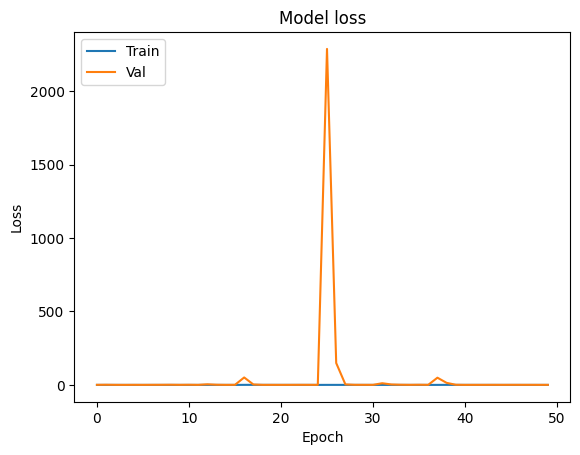

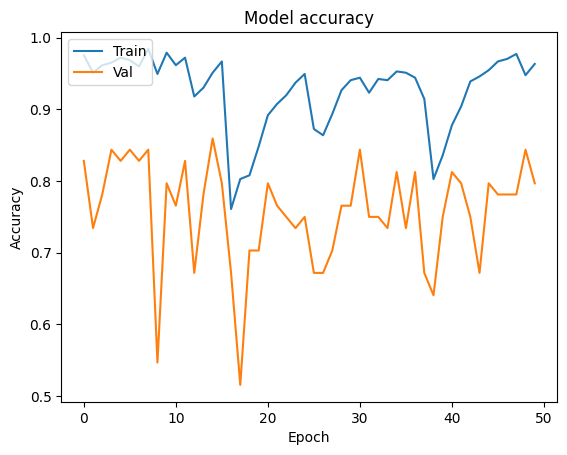

In [ ]:
# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# **Run prediction on a sample train image**

1/1 [==============================] - 1s 780ms/step


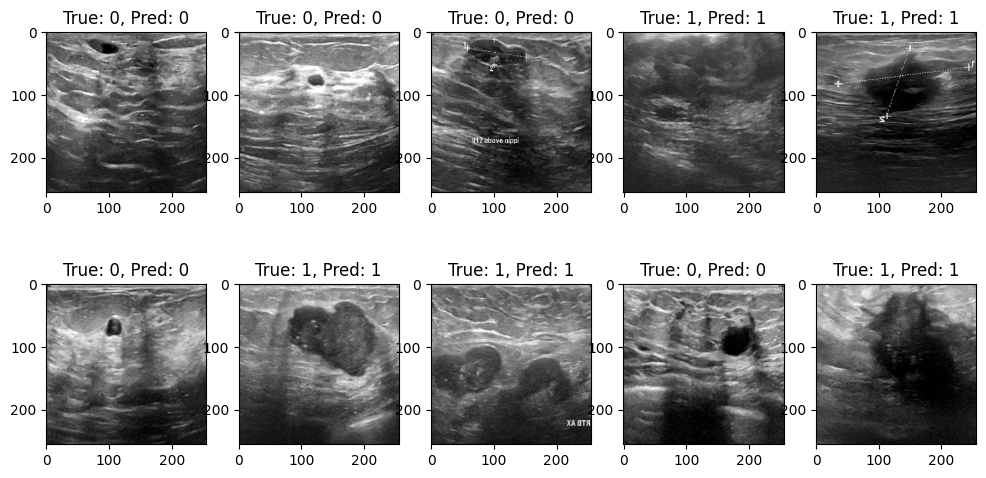

In [ ]:
# Get a batch of image data from the generator
x_batch, y_batch = train_batches.next()

# Infer the labels for the images using the model
y_pred = model.predict(x_batch)

# Convert the one-hot encoded labels back to class labels
y_true = np.argmax(y_batch, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Visualize the first 10 images in the batch and their predicted labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_batch[i])
    ax.set_title(f"True: {y_true[i]}, Pred: {y_pred[i]}")
plt.show()

## Validation Data inference on the model

1/1 [==============================] - 0s 22ms/step


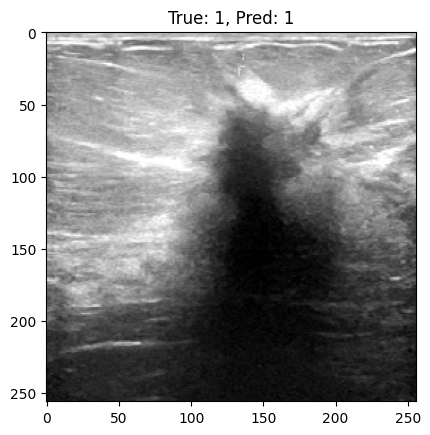

1/1 [==============================] - 0s 22ms/step


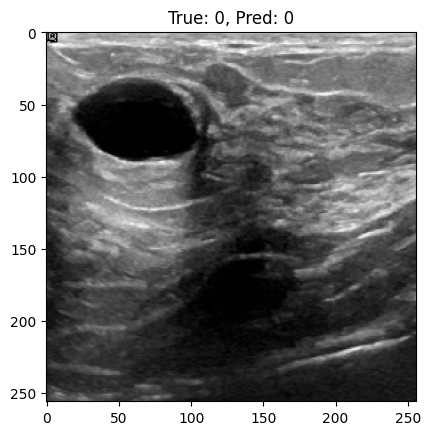

1/1 [==============================] - 0s 28ms/step


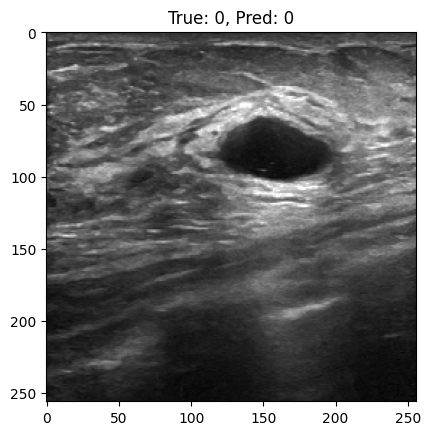

1/1 [==============================] - 0s 23ms/step


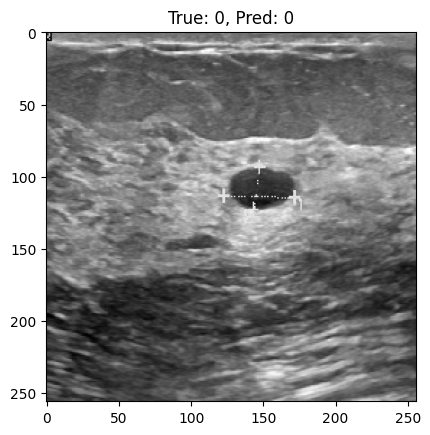

1/1 [==============================] - 0s 30ms/step


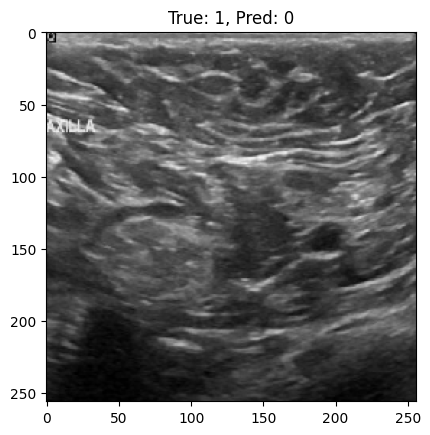

1/1 [==============================] - 0s 35ms/step


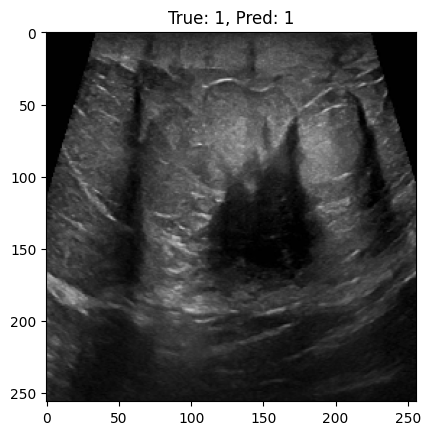

1/1 [==============================] - 0s 25ms/step


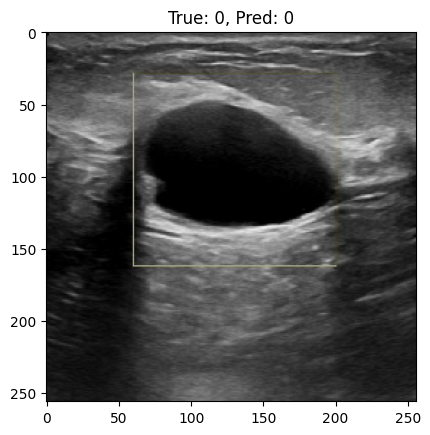

1/1 [==============================] - 0s 23ms/step


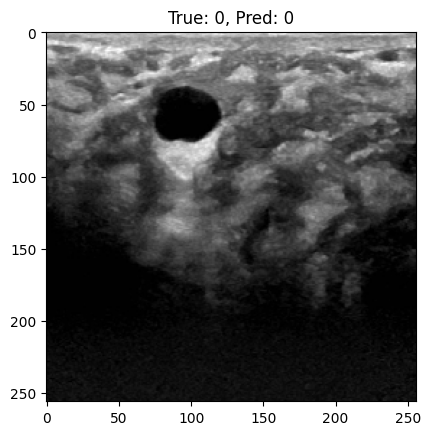

1/1 [==============================] - 0s 34ms/step


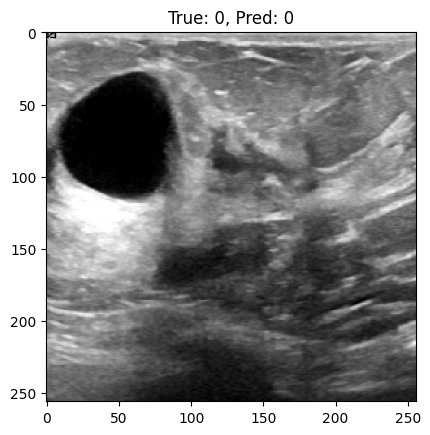

1/1 [==============================] - 0s 36ms/step


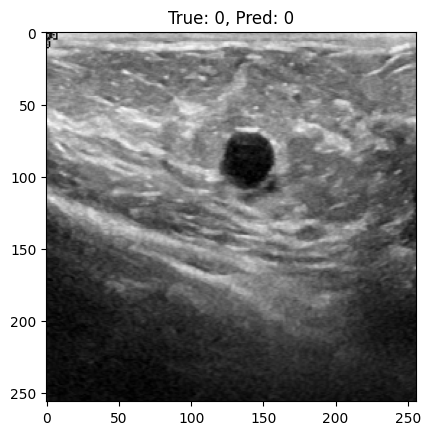

In [ ]:
# Define the number of iterations
num_iterations = 10

# Iterate over the generator for num_iterations
for i in range(num_iterations):
    # Get a batch of image data from the generator
    x_batch, y_batch = valid_batches.next()

    # Infer the labels for the images using the model
    y_pred = model.predict(x_batch)

    # Convert the one-hot encoded labels back to class labels
    y_true = np.argmax(y_batch, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    # Visualize the first image in the batch and its predicted label
    plt.imshow(x_batch[0])
    plt.title(f"True: {y_true[0]}, Pred: {y_pred[0]}")
    plt.show()

## Plot Confusion Matrix on Validation Data

1/1 [==============================] - 0s 25ms/step


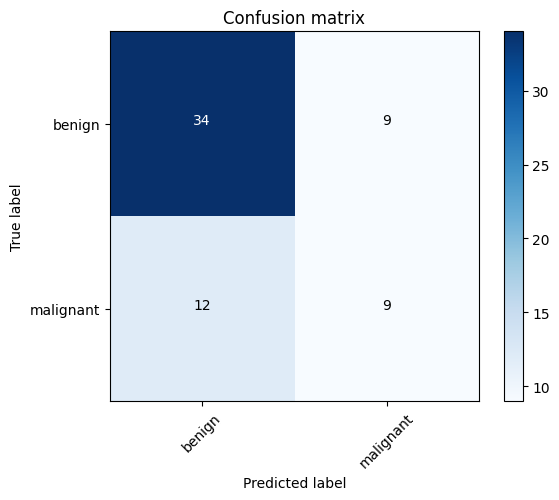

In [ ]:
# Define the number of validation samples
num_val_samples = len(valid_batches.filenames)

# Get the true labels for all the validation samples
y_true = []
for i in range(num_val_samples):
    _, y_batch = valid_batches.next()
    y_true.extend(np.argmax(y_batch, axis=1))

# Get the predicted labels for all the validation samples
y_pred = []
for i in range(num_val_samples):
    x_batch, _ = valid_batches.next()
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()

# Add the class labels to the plot
class_names = valid_batches.class_indices.keys()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add the values to the plot
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Add labels and title to the plot
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()